---
title: "Homework 0"
author: "Tony Lei"
date: "2023-10-04"
categories: [Week 1, Homework]
---

## Introduction 

In this tutorial, we will be learning how to construct interesting data visualizations using the Palmer Penguins data set. The **Palmer Penguins** data set is a dataset provided by Dr. Kristen Gorman and the Palmer Station, Antarctica Long Term Ecological Research (LTER) Program. This dataset includes features such as size measurements, Nitrogen isotope ratios, and geographical data amongst others that can be explored.  

First, let's download our data using the following code below. We need to import the pandas library using `import pandas as pd`. We will also import `matplotlib` and `seaborn` linraries that will help us with plotting later. Then we will fetch our data using the url link given by `url` and read in the data with `pd.read_csv(url)`

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

## Exploration
Now that we've downloaded the data and stored it into a dataframe called `penguins`, let's see how it looks like. We can do that with the function `penguins.head()`. `penguins` is the name of the dataframe and the `.head(n)` method allows us the preview the first $n$ rows of the dataframe.

In [18]:
penguins.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


We see that there are a lot of columns to look at which can be confusing at times so let's take a subset of those columns and further examine those. We can look at all the columns with `penguins.columns`. We see that there are $17$ columns. Before we can subset it, we'll copy the original dataframe using `penguins.copy()` to make a copy of the dataframe and assign it to penguins_copy. Then we can pick the columns we want to subset and store them in a variable called `cols`. To subset the data we can simply do `penguins[cols]`.

In [19]:
#create a subdf 
penguins.columns


Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

In [20]:
penguins_copy = penguins.copy()
cols = ['Species', 'Region', 'Island',  'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
penguins_subset = penguins_copy[cols]

Now that we have subsetted out data, lets take a look at it again with `penguins_subset.head()`

In [21]:
penguins_subset.head()

,Species,Region,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.1,18.7,181.0,3750.0,MALE,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426


Great! Now that we've subsetted our data let's select 4 quantitaive features to build a correlation matrix. This can be done using `penguins_subset[cols].corr` since we are subsetting the dataframe `penguins_subset`.

In [22]:
cols = ['Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
penguins_subset[cols].corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,-0.235053,0.656181,0.595110
Culmen Depth (mm),-0.235053,1.000000,-0.583851,-0.471916
Flipper Length (mm),0.656181,-0.583851,1.000000,0.871202
Body Mass (g),0.595110,-0.471916,0.871202,1.000000


The correlation matrix tells us how one variable is related to another. Note that higher absolute values indicate higher correlation. We see that `Culmen Length (mm)` and `Flipper Length (mm)` have a correlation of $0.656181$ which indicates that there is a somewhat strong correlation between these 2 variables. Let's plot this correlation to see it visually using the `sns.scatterplot()` function.

## Plotting
We can look into the documentation for `sns.scatterplot` to see what we should input as our parameters. <br>
'seaborn.scatterplot(data=None, *, x=None, y=None, hue=None,...)' <br>
We can fill in these parameters with the ones we want to plot. - `data=penguins_subset`: this is the dataframe we want to plot from
- `x = 'Culmen Length (mm)'`: this is the column we want to plot on our $x-$axis
- `y = 'Flipper Length (mm)'`: this is the column we want to plot on our $y-$axis
- `hue = 'Island'` : this allows use to color the points based on a 3rd variable that is categorical. We choose `Island` in this case but `Sex`, `Region`, etc... also work!

We can also add a title to our plot by doing `plt.title("INSERT TITLE")`. We will go with "Culmen Length vs Flipper Length"

Text(0.5, 1.0, 'Culmen Length vs Flipper Length')

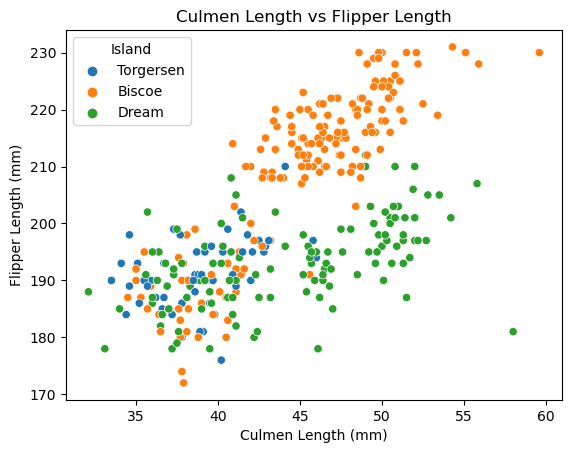

In [23]:
sns.scatterplot(data = penguins_subset, x='Culmen Length (mm)', y = 'Flipper Length (mm)', hue = 'Island')
plt.title("Culmen Length vs Flipper Length")

Congrats! You have created your first plot. We can indeed see that there is a decently strong positive correlation between culmen length and flipper length. Let's do another just for fun using `Body Mass (g)` and `Flipper Length (mm)` and using `Species` for hue. Like for the previous one, we'll add a title as well.

Text(0.5, 1.0, 'Body Mass vs Flipper Length')

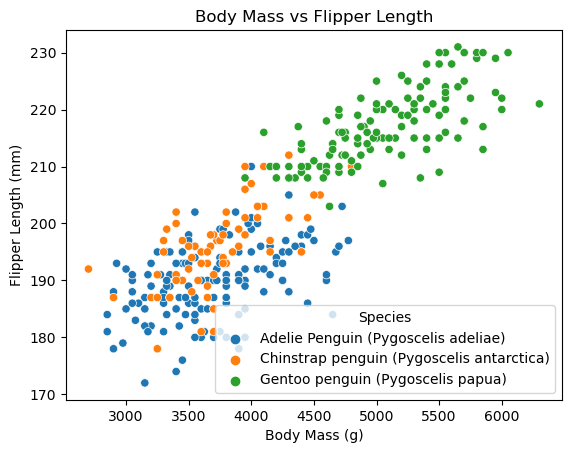

In [24]:
sns.scatterplot(data = penguins_copy, x='Body Mass (g)', y = 'Flipper Length (mm)', hue = 'Species')
plt.title("Body Mass vs Flipper Length")